In [1]:
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,Dropout,LSTM,SimpleRNN,Embedding,Bidirectional,LSTM,GlobalMaxPool1D
from keras.models import Sequential

In [2]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.style.use('ggplot')
import re
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import defaultdict
from collections import  Counter
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.initializers import Constant
from keras.layers import (LSTM, 
                          Embedding, 
                          BatchNormalization,
                          Dense, 
                          TimeDistributed, 
                          Dropout, 
                          Bidirectional,
                          Flatten, 
                          GlobalMaxPool1D)
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report,
    accuracy_score
)

In [3]:
train = pd.read_csv(r'C:\Users\Ishaan\Documents\Spring 22 Class notes\Data Mining/train.csv')
test = pd.read_csv(r'C:\Users\Ishaan\Documents\Spring 22 Class notes\Data Mining/test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
train.head(50)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [6]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

<AxesSubplot:>

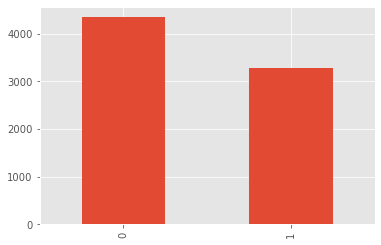

In [7]:
train['target'].value_counts().plot(kind = 'bar')

In [8]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [9]:
""" Dataset seems balanced, some pre processing is required to clean up stop words and puncutations,
I will also convert data to lowercase"""

' Dataset seems balanced, some pre processing is required to clean up stop words and puncutations,\nI will also convert data to lowercase'

In [10]:
import nltk
import re
import string
from nltk.tokenize import RegexpTokenizer,TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ishaan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ishaan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
def RemoveUnneccasaryChar(sentence):
    for sentence1 in sentence:
        sentence1 = str(sentence1)
        sentence1 = sentence1.lower()
        formatted_sent = re.sub(r'https?:\/\/.*[\r\n]*','',sentence1) #  Remove hyperlinks
        formatted_sent = formatted_sent.replace('{html}',"")
        formatted_sent = re.sub(r'#','',formatted_sent) # Removed Hashtags
        formatted_sent = re.sub(r'[0-9]','',formatted_sent) # Removes Numbers
        formatted_sent = re.sub(r'@[A-Za-z]*','',formatted_sent)

In [12]:
def TokenizeSentence(sentence):
    tokenizer = TweetTokenizer(preserve_case = False,strip_handles = True,reduce_len=True)
    for sentence in sent:
        tokenized_sentence = tokenizer.tokenize(sentence)
        tokenized_sent.append(tokenized_sentence)

In [13]:
def stopwordsSentence(sent):
    for sentence in sent:
        formatted_words=[]
        for word in sentence:
            if word not in stopwords_eng and word not in string.punctuation and len(word)>2:
                formatted_words.append(word)
        formatted_sent.append(formatted_words)  

In [14]:
def lemmatizeSentence(sent):
    lemma = WordNetLemmatizer()
    for sentence in sent:
            lemma_words = []
            for word in sentence:
                lemma_word = lemma.lemmatize(word)
                lemma_words.append(lemma_word)
            lemma_sent.append(lemma_words)   

In [15]:
def finalSentence(sentence1):
    for sentence in sentence1:
        sent = ' '.join([str(word) for word in sentence])
        final_sentence_list.append(sent)

In [16]:
stopwords_eng = stopwords.words('english')
print('English Stop Words :\n')
print(stopwords_eng)
print('\nPunctuations  :\n')
print(string.punctuation)

English Stop Words :

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', '

Text(0, 0.5, 'tweets')

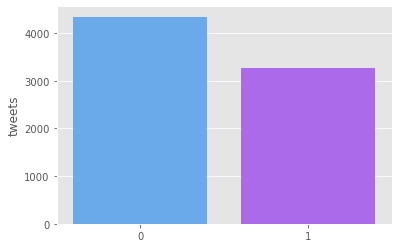

In [17]:
import matplotlib.pyplot as plt
x = train.target.value_counts()
sns.barplot(x.index, x, palette='cool')
plt.gca().set_ylabel('tweets')

Text(0.5, 0.98, 'Characters in tweets')

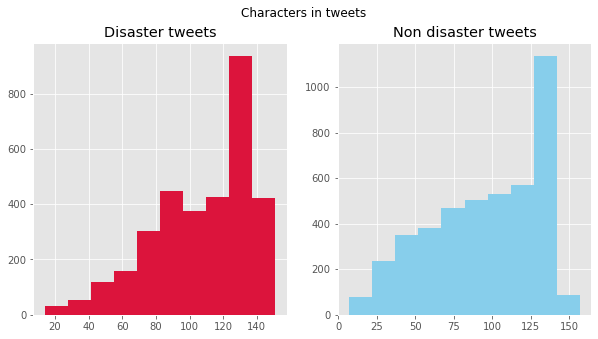

In [18]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
tweet_len = train[train['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='crimson')
ax1.set_title('Disaster tweets')
tweet_len = train[train['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='skyblue')
ax2.set_title('Non disaster tweets')
fig.suptitle('Characters in tweets')
#Number of characters in tweets

Text(0.5, 0.98, 'Words in a tweet')

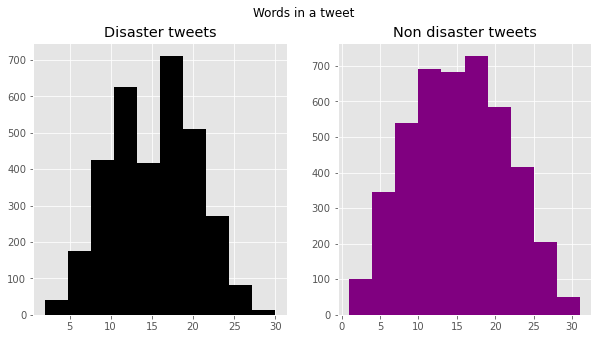

In [19]:
#Number of words in a tweet
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
tweet_len = train[train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color='black')
ax1.set_title('Disaster tweets')
tweet_len = train[train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='purple')
ax2.set_title('Non disaster tweets')
fig.suptitle('Words in a tweet')

Text(0.5, 0.98, 'Average word length in each tweet')

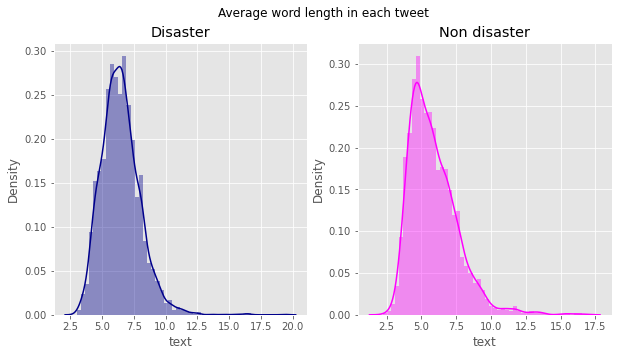

In [20]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word = train[train['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='darkblue')
ax1.set_title('Disaster')
word = train[train['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='magenta')
ax2.set_title('Non disaster')
fig.suptitle('Average word length in each tweet')

In [21]:
from collections import defaultdict

In [22]:
def create_corpus(target):
    corpus=[]
    for x in train[train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [23]:
def create_corpus_df(train, target):
    corpus=[]
    for x in train[train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

<BarContainer object of 20 artists>

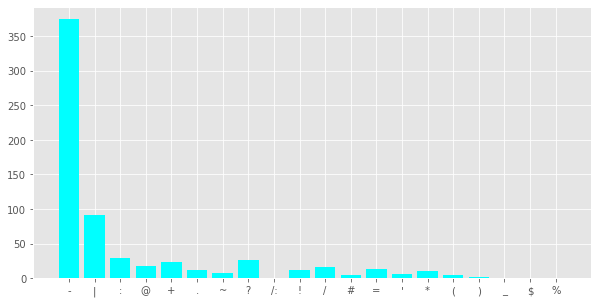

In [24]:
plt.figure(figsize=(10,5))
corpus = create_corpus(0)
dic = defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
x,y=zip(*dic.items())
plt.bar(x, y,color='cyan')

<BarContainer object of 18 artists>

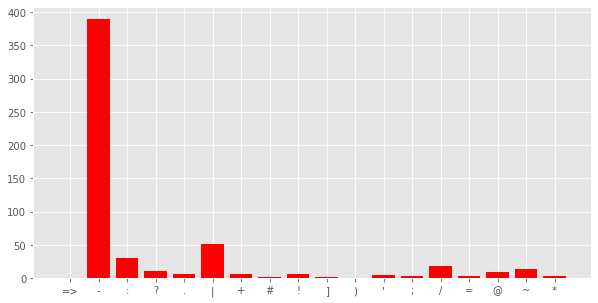

In [25]:
#Punctuations in disaster class
plt.figure(figsize=(10,5))
corpus = create_corpus(1)
dic = defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
x,y = zip(*dic.items())
plt.bar(x, y, color='red')

In [26]:
from collections import  Counter
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

<AxesSubplot:>

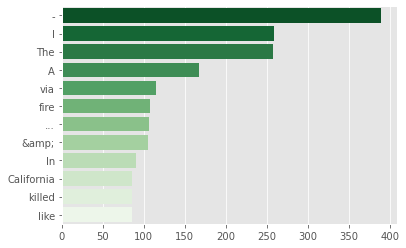

In [27]:
#Common words
counter = Counter(corpus)
most = counter.most_common()
x=[]
y=[]
for word, count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
sns.barplot(x=y, y=x, palette='Greens_r')

<AxesSubplot:>

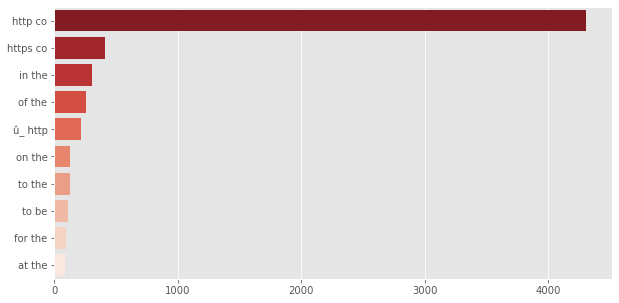

In [28]:
#Bigram analysis
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
plt.figure(figsize=(10,5))
top_tweet_bigrams = get_top_tweet_bigrams(train['text'])[:10]
x,y = map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x, palette='Reds_r')

In [29]:
df = pd.concat([train,test])
df.shape

(10876, 5)

<AxesSubplot:xlabel='location'>

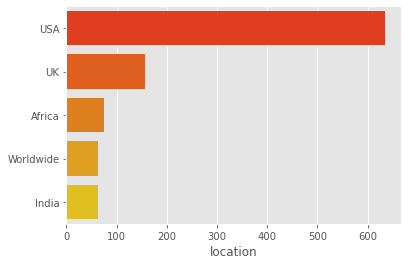

In [30]:
#Renaming location names
df['location'].replace({'United States':'USA',
                           'New York':'USA',
                            "London":'UK',
                            "Los Angeles, CA":'USA',
                            "Washington, D.C.":'USA',
                            "California":'USA',
                             "Chicago, IL":'USA',
                             "Chicago":'USA',
                            "New York, NY":'USA',
                            "California, USA":'USA',
                            "FLorida":'USA',
                            "Nigeria":'Africa',
                            "Kenya":'Africa',
                            "Everywhere":'Worldwide',
                            "San Francisco":'USA',
                            "Florida":'USA',
                            "United Kingdom":'UK',
                            "Los Angeles":'USA',
                            "Toronto":'Canada',
                            "San Francisco, CA":'USA',
                            "NYC":'USA',
                            "Seattle":'USA',
                            "Earth":'Worldwide',
                            "Ireland":'UK',
                            "London, England":'UK',
                            "New York City":'USA',
                            "Texas":'USA',
                            "London, UK":'UK',
                            "Atlanta, GA":'USA',
                            "Mumbai":"India"},inplace=True)
sns.barplot(y = df['location'].value_counts()[:5].index, x = df['location'].value_counts()[:5],
            palette='autumn', orient='h')

In [31]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
# Applying the cleaning function to both test and training datasets
df['text'] = df['text'].apply(lambda x: clean_text(x))
# Let's take a look at the updated text
df['text'].head()

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [32]:
#Removing Emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['text']=df['text'].apply(lambda x: remove_emoji(x))

In [33]:
"""
Now we will Make the LSTM model

"""

'\nNow we will Make the LSTM model\n\n'

In [35]:
tweet_1 = train.text.values
test_1 = test.text.values
sentiments = train.target.values

In [36]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(tweet_1)
vocab_length = len(word_tokenizer.word_index) + 1

In [37]:
def metrics(pred_tag, y_test):
    print("F1-score: ", f1_score(pred_tag, y_test))
    print("Precision: ", precision_score(pred_tag, y_test))
    print("Recall: ", recall_score(pred_tag, y_test))
    print("Acuracy: ", accuracy_score(pred_tag, y_test))
    print("-"*50)
    print(classification_report(pred_tag, y_test))
def embed(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)

In [38]:
def plot(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]],fontsize=18)
        ax[idx].set_xlabel('A ',fontsize=16)
        ax[idx].set_ylabel('B',fontsize=16)
        ax[idx].set_title(arr[idx][0] + ' X ' + arr[idx][1],fontsize=16)

In [40]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ishaan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [41]:
longest_train = max(tweet_1, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))
padded_sentences = pad_sequences(embed(tweet_1), length_long_sentence, padding='post')
test_sentences = pad_sequences(
    embed(test_1), 
    length_long_sentence,
    padding='post'
)

In [49]:
embeddings_dictionary = dict()
embedding_dim = 100
glove_file = open(r'C:\Users\Ishaan\Downloads\archive\glove.6B.100d.txt',encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [50]:
embedding_matrix = np.zeros((vocab_length, embedding_dim))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    padded_sentences, 
    sentiments, 
    test_size=0.25
)

In [52]:
def BLSTM():
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0], 
                        output_dim=embedding_matrix.shape[1], 
                        weights = [embedding_matrix], 
                        input_length=length_long_sentence))
    model.add(Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.2)))
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [53]:
model = BLSTM()
checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor = 'val_loss', 
    verbose = 1, 
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001
)
history = model.fit(
    X_train, 
    y_train, 
    epochs = 7,
    batch_size = 32,
    validation_data = [X_test, y_test],
    verbose = 1,
    callbacks = [reduce_lr, checkpoint]
)

Epoch 1/7
179/179 [==============================] - ETA: 0s - loss: 0.6578 - accuracy: 0.6875
Epoch 1: val_loss improved from inf to 0.57912, saving model to model.h5
179/179 [==============================] - 23s 106ms/step - loss: 0.6578 - accuracy: 0.6875 - val_loss: 0.5791 - val_accuracy: 0.7831 - lr: 0.0010
Epoch 2/7
179/179 [==============================] - ETA: 0s - loss: 0.5269 - accuracy: 0.7660
Epoch 2: val_loss improved from 0.57912 to 0.47749, saving model to model.h5
179/179 [==============================] - 19s 106ms/step - loss: 0.5269 - accuracy: 0.7660 - val_loss: 0.4775 - val_accuracy: 0.7889 - lr: 0.0010
Epoch 3/7
179/179 [==============================] - ETA: 0s - loss: 0.4654 - accuracy: 0.8054
Epoch 3: val_loss improved from 0.47749 to 0.42878, saving model to model.h5
179/179 [==============================] - 20s 111ms/step - loss: 0.4654 - accuracy: 0.8054 - val_loss: 0.4288 - val_accuracy: 0.8083 - lr: 0.0010
Epoch 4/7
179/179 [============================

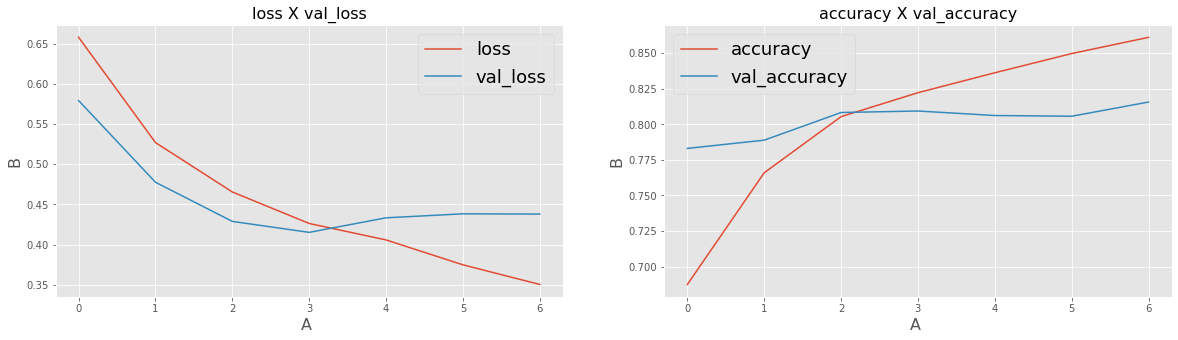

In [54]:
plot(history, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])

In [55]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

60/60 [==============================] - 1s 15ms/step - loss: 0.4379 - accuracy: 0.8157
Loss: 0.437905490398407
Accuracy: 0.8156512379646301


In [70]:
preds = (model.predict(X_test) > 0.5).astype("int32")
metrics(preds, y_test)

F1-score:  0.7568653717347622
Precision:  0.671021377672209
Recall:  0.8678955453149002
Acuracy:  0.8093487394957983
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1253
           1       0.67      0.87      0.76       651

    accuracy                           0.81      1904
   macro avg       0.80      0.82      0.80      1904
weighted avg       0.83      0.81      0.81      1904



In [71]:
model.load_weights('model.h5')
preds = (model.predict(X_test) > 0.5).astype("int32")
metrics(preds, y_test)

F1-score:  0.7568653717347622
Precision:  0.671021377672209
Recall:  0.8678955453149002
Acuracy:  0.8093487394957983
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1253
           1       0.67      0.87      0.76       651

    accuracy                           0.81      1904
   macro avg       0.80      0.82      0.80      1904
weighted avg       0.83      0.81      0.81      1904



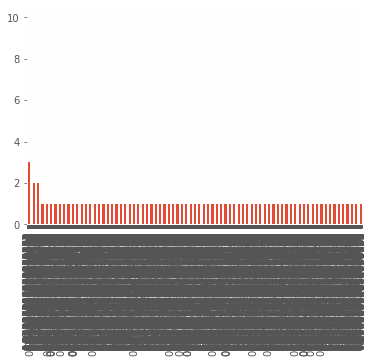

In [72]:
submission = pd.read_csv(r"C:\Users\Ishaan\Documents\Spring 22 Class notes\Data Mining\sample_submission.csv")
submission.target = model.predict(test_sentences)
submission.to_csv("submission.csv", index=False)
submission.target.value_counts().plot.bar();

In [73]:
submission

,id,target
0,0,0.532188
1,2,0.543876
2,3,0.745499
3,9,0.841083
4,11,0.987661
...,...,...
3258,10861,0.736375
3259,10865,0.956169
3260,10868,0.866479
3261,10874,0.693900
